# Strategy Class

In [118]:
### Main libraries
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime
from coinapi_rest_v1 import CoinAPIv1
from logins import CoinAPI_KEY
from robin_helperfunctions import round_to_hour

from robinhoodstrategy import cryptoStrategy, BackcastStrategy, Trade

___
### Testing

In [59]:
test_strategy = cryptoStrategy('test')

In [85]:
def entry_test_fun(hist_data):
    
    ma_8 = hist_data['price_close'].rolling(8).mean()
    ma_13 = hist_data['price_close'].rolling(13).mean()
    ma_21 = hist_data['price_close'].rolling(21).mean()
    ma_55 = hist_data['price_close'].rolling(55).mean()
    
#     print('Entry check: ', ma_8[-1], ma_13[-1], ma_21[-1], ma_55[-1])
    
    if ma_8[-1] > ma_13[-1] > ma_21[-1] > ma_55[-1]:
        return True
    else:
        return False
test_strategy.add_entry_conditions(entry_test_fun)

In [86]:
def exit_test_fun(hist_data):
    
    ma_8 = hist_data['price_close'].rolling(8).mean()
    ma_13 = hist_data['price_close'].rolling(13).mean()
    
#     print('Exit check: ', ma_3[-1], ma_10[-1])    
    
    if ma_8[-1] <= ma_13[-1]:
        return True
    else:
        return False

test_strategy.add_exit_conditions(exit_test_fun)

In [159]:
backtest = BackcastStrategy(test_strategy)

In [160]:
backtest.set_parameters(1000, 'KRAKEN_SPOT_ETH_USD', '2020-04-01T00:00:00', '2020-08-31T23:00:00', '4HRS', 1, 55)

In [161]:
backtest.run_backcast(CoinAPI_KEY)

Running backcast between 2020-04-01T00:00:00 and 2020-08-31T23:00:00. Staring with $None


HTTPError: HTTP Error 429: Too Many Requests

In [ ]:
backtest.trades

In [ ]:
money = 1000
for x in backtest.trades['pct_change']:
    money = money * (1+x)
    print(money)

In [ ]:
backtest.capital

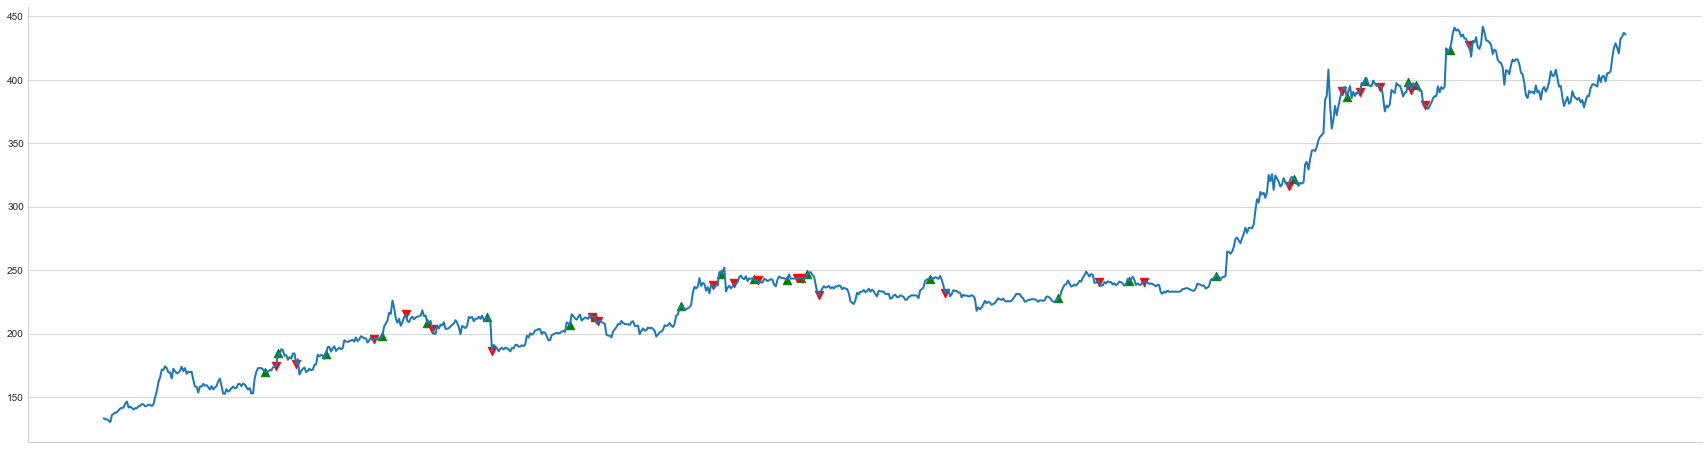

In [142]:
backtest.plot_trades()

___